<a href="https://colab.research.google.com/github/reemaratnani/startup_project_stripe_payment/blob/master/DermDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


In [0]:
data = pd.read_csv("derm.csv")
data.head()


,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [0]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [0]:
data.dropna(inplace=True)

In [0]:
data.isnull().sum()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [0]:
corr = data.corr()

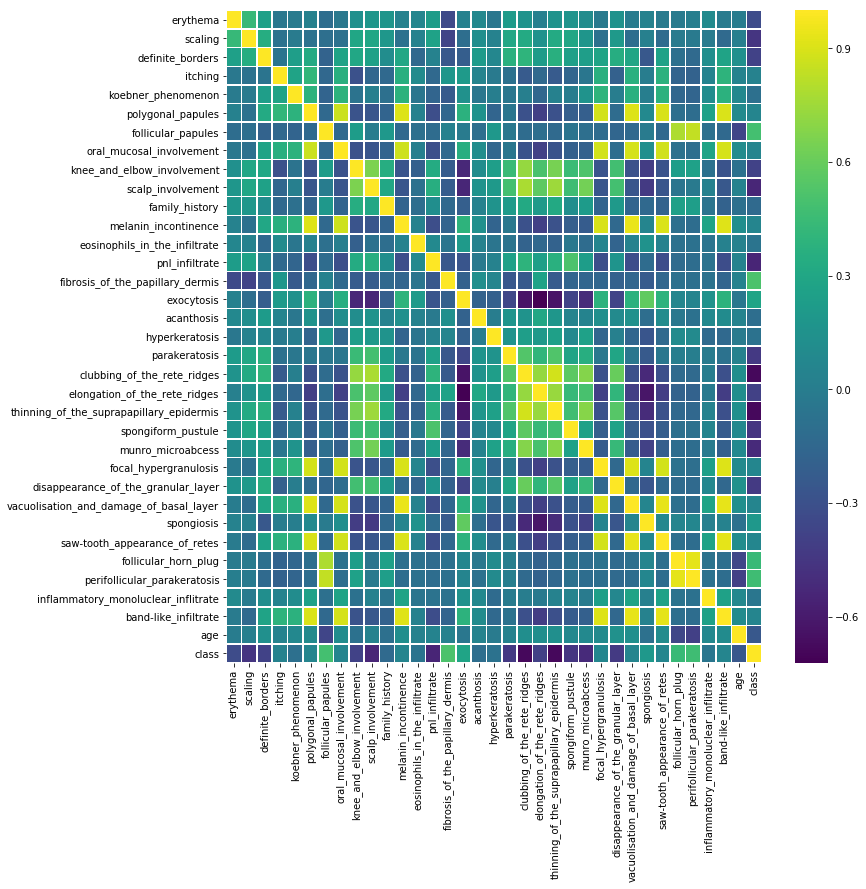

In [0]:
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
#The Class code column is the value that needs to be predicted from the analysis. 
#Hence we will have to split X and y(Features and labels) based on this information
X = data.iloc[:,0:34]  # all rows, all the features and no labels
y = data.iloc[:,-1]  # all rows, label only

In [0]:
scaled_data = scaler.fit_transform(X)

In [0]:
scaled_data

array([[-0.11780106,  0.27511883, -1.74493776, ..., -1.25595981,
        -0.50491529,  1.22222703],
       [ 1.38836958,  1.70254696,  1.58969418, ..., -1.25595981,
        -0.50491529, -1.84903821],
       [-0.11780106, -1.1523093 ,  0.4781502 , ...,  0.17599437,
         2.20647983, -0.67280897],
       ...,
       [ 1.38836958,  0.27511883,  0.4781502 , ...,  0.17599437,
         2.20647983, -0.54211683],
       [-0.11780106, -1.1523093 ,  1.58969418, ...,  0.17599437,
         2.20647983,  0.89549669],
       [ 1.38836958,  0.27511883,  0.4781502 , ...,  1.60794855,
        -0.50491529, -0.08469435]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 1.86081456e+01,  1.33190905e+00, -3.38226162e+00, ...,
        -5.71167714e-02, -6.89084339e-03,  2.52677197e-02],
       [-2.82338566e+01, -2.62565710e+00,  2.29329456e+00, ...,
        -1.87191327e-01,  3.55507576e-02, -2.87744035e-02],
       [-1.02227885e+01,  4.87409013e+00,  2.58926753e+00, ...,
         1.28995584e-03,  4.39512439e-01,  3.04772824e-02],
       ...,
       [-8.18888924e+00,  5.60004273e+00,  3.47550133e+00, ...,
        -2.08263406e-01,  3.47226172e-01, -5.38868377e-02],
       [ 1.37743400e+01,  4.84745377e+00,  2.21857674e+00, ...,
         1.63701217e-01,  1.90897558e-01, -3.13084496e-02],
       [-1.23531447e+00, -4.75303549e+00,  2.70195308e+00, ...,
        -5.45351110e-02,  2.38096187e-02,  7.60130430e-02]])

In [0]:
pca.get_covariance()

array([[ 4.42044974e-01,  1.99990611e-01,  1.48584573e-01, ...,
         4.32530554e-02, -1.02029639e-02, -5.12339014e-02],
       [ 1.99990611e-01,  4.92159992e-01,  2.19379372e-01, ...,
        -4.14691016e-03, -1.04909003e-01,  1.72073299e-01],
       [ 1.48584573e-01,  2.19379372e-01,  8.11636386e-01, ...,
         7.86348059e-02,  2.74603696e-01,  1.91203856e+00],
       ...,
       [ 4.32530554e-02, -4.14691016e-03,  7.86348059e-02, ...,
         4.89053722e-01,  2.03308139e-01,  8.76828944e-01],
       [-1.02029639e-02, -1.04909003e-01,  2.74603696e-01, ...,
         2.03308139e-01,  1.22764189e+00,  1.77530006e+00],
       [-5.12339014e-02,  1.72073299e-01,  1.91203856e+00, ...,
         8.76828944e-01,  1.77530006e+00,  2.34842057e+02]])

In [0]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([9.06616104e-01, 3.32571204e-02, 1.71904529e-02, 7.02278873e-03,
       4.38352443e-03, 3.36613349e-03, 3.09189998e-03, 2.51840606e-03,
       2.30239516e-03, 2.05333570e-03, 1.94420954e-03, 1.83552679e-03,
       1.61050878e-03, 1.46788374e-03, 1.37526409e-03, 1.12856748e-03,
       9.96859060e-04, 9.65367260e-04, 9.19719864e-04, 8.61413243e-04,
       7.78905855e-04, 6.53039691e-04, 5.63985943e-04, 4.23282065e-04,
       4.15558578e-04, 3.80087762e-04, 3.65858806e-04, 3.08987743e-04,
       2.82029263e-04, 2.64471230e-04, 2.54269250e-04, 2.02007843e-04,
       1.49066799e-04, 5.09683343e-05])

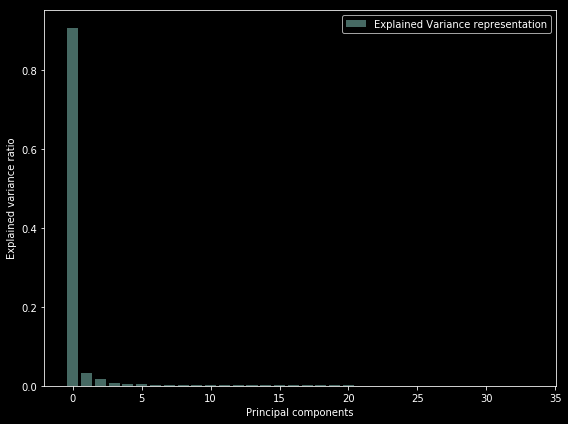

In [0]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(34), explained_variance, alpha=0.5, align='center',
            label='Explained Variance representation')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The above graph is a clear indication that first column 'erythema' has the largest explained variance ratio in the given dataset. The second column 'scaling' is the next highest but at a very distant importance level.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape

(250, 34)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [0]:
model = RandomForestRegressor()
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
       
print(scores)

[0.8774116510215351, 0.8680190502484815, 0.8672114853672004, 0.8853389874378796, 0.8851225289895085, 0.8739153092214246, 0.8870628753986409, 0.8778548410753727, 0.8703096815755568, 0.8809062948647156, 0.8880761279782413, 0.875253485643291, 0.8761569664672497, 0.8819693215497132, 0.8874506350082827, 0.8715623867597322, 0.8858582595021963, 0.8781973587336647, 0.8802064484353084, 0.8808221528161236, 0.8800127621451672, 0.8801880467619826, 0.882730446890928, 0.88434014356709, 0.8857117283268913, 0.8755118702603093, 0.8798124118044052, 0.8784819914299237, 0.8786710179107594]


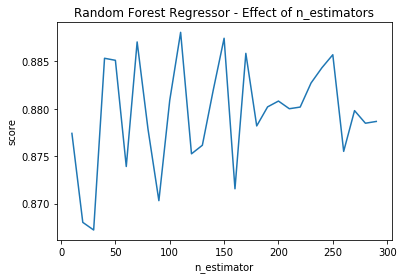

In [0]:
plt.title("Random Forest Regressor - Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
estimators = np.arange(100, 2000, 200)
scores = []
for n in estimators:
    clf = AdaBoostClassifier(learning_rate = 0.1,n_estimators = n,random_state=42)
    clf_check = clf.fit(X_train,y_train)
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(score)
    print('The Estimator {} has a score of {}'.format(n,score))

The Estimator 100 has a score of [0.88461538 0.9        0.92       0.9        0.89583333]
The Estimator 300 has a score of [0.86538462 0.92       0.84       0.9        0.91666667]
The Estimator 500 has a score of [0.86538462 0.94       0.82       0.92       0.9375    ]
The Estimator 700 has a score of [0.90384615 0.96       0.82       0.9        0.9375    ]
The Estimator 900 has a score of [0.88461538 0.96       0.8        0.92       0.95833333]
The Estimator 1100 has a score of [0.88461538 0.94       0.8        0.9        0.9375    ]
The Estimator 1300 has a score of [0.88461538 0.94       0.8        0.92       0.95833333]
The Estimator 1500 has a score of [0.90384615 0.96       0.8        0.94       0.95833333]
The Estimator 1700 has a score of [0.88461538 0.96       0.8        0.94       0.95833333]
The Estimator 1900 has a score of [0.90384615 0.96       0.8        0.94       0.95833333]


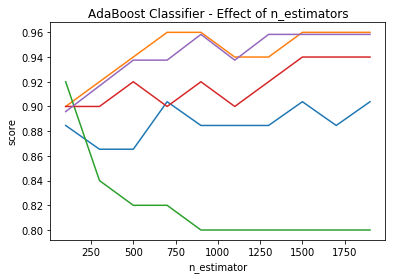

In [0]:
plt.title("AdaBoost Classifier - Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test,y_test)

0.9629629629629629

In [0]:
rfr = RandomForestRegressor()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
rfr_abc_gbc = VotingClassifier(estimators=[('AdaBoostClassifier',abc), ('GradientBoostingClassifier', gbc)], voting='soft', weights=[2,1]).fit(X_train,y_train)
print('The ensembled model with RandomForestRegressor, AdaBoostClassifier and GradientBoostingClassifier:', rfr_abc_gbc.score(X_test,y_test))

The ensembled model with RandomForestRegressor, AdaBoostClassifier and GradientBoostingClassifier: 0.9629629629629629


In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
mlp = MLPClassifier()
gnb = GaussianNB()
lr = LogisticRegression()
gnb_mlp_lr=VotingClassifier(estimators=[('Guassian Naive Bayes', gnb),('Multilayer Perceptron',mlp), ('Logistic Regression', lr)], voting='soft', weights=[3,2,1]).fit(X_train,y_train)
print('The ensembled model with Guassian Naive Bayes, Multilayer Perceptron, and Logistic Regression:',gnb_mlp_lr.score(X_test,y_test))

The ensembled model with Guassian Naive Bayes, Multilayer Perceptron, and Logistic Regression: 0.8425925925925926


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools

In [0]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [0]:
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction_SVM_all = classifier.predict(X_test)